# Textkiller 2023 US TV Uplift Analysis - Spend

## Treatment start date: 2022-10-26

In [ ]:
from causalimpact import CausalImpact

In [117]:
import numpy as np
import pandas as pd
import datetime

In [157]:
from statsmodels.tsa.arima_process import ArmaProcess

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [382]:
df = pd.read_csv("KOEPPEL FUNNEL.csv", parse_dates=['Date'], )

In [383]:
df['Spend']=df.Spend.str[1:]

In [384]:
df['Spend'] = df.Spend.str.replace(',', '').astype(str).astype(float)

In [385]:
df = df.dropna(how='any', subset=['Spend'])
df = df.dropna(how='any', subset=['Date'])

In [386]:
df=df.sort_values(by=['Date'])

In [387]:
df

,Date,Granularity,Spend,Installs,CPI,Trials,tCVR,CPT,Frequency,Rate
230,2022-03-14,,2123.0,71,$30.10,17,24.65%,$122.10,67,$31.69
229,2022-03-15,,3921.0,389,$10.09,69,17.80%,$56.70,106,$36.99
228,2022-03-16,,3377.0,336,$10.06,73,21.87%,$45.98,102,$33.11
227,2022-03-17,,3018.0,328,$9.20,64,19.65%,$46.81,100,$30.18
226,2022-03-18,,2727.0,294,$9.28,55,18.61%,$49.85,97,$28.11
...,...,...,...,...,...,...,...,...,...,...
4,2022-10-26,,97.0,47,$2.07,3,6.60%,$31.40,8,$12.11
3,2022-10-27,,88.0,102,$0.87,7,6.69%,$13.01,9,$9.82
2,2022-10-28,,145.0,115,$1.25,8,6.64%,$18.88,11,$13.14
1,2022-10-29,,88.0,38,$2.32,4,9.67%,$23.98,8,$11.05


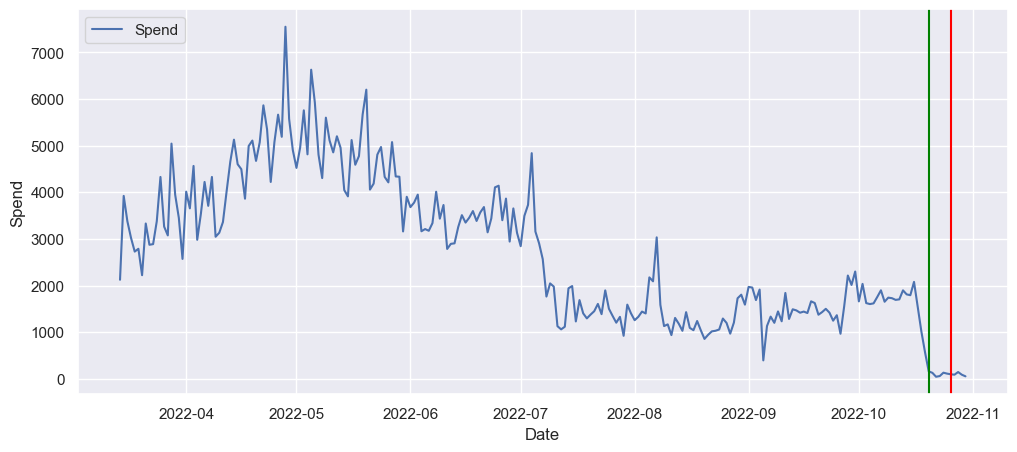

In [388]:
sns.set(rc={'figure.figsize':(12,5)})
sns.lineplot(x=df.Date, y=df['Spend'])
plt.axvline(x= df.Date.loc[df['Date'] == '2022-10-26'], color='red')
plt.axvline(x= df.Date.loc[df['Date'] == '2022-10-20'], color='green')
plt.legend(labels = ['Spend'])

Pre and post intervention periods.

In [389]:
# Print out the time series start date
print(f'The time-series start date is :{df.Date.min()}')
# Print out the time series end date
print(f'The time-series end date is :{df.Date.max()}')

The time-series start date is :2022-03-14 00:00:00
The time-series end date is :2022-10-30 00:00:00


In [390]:
pre_period  = [ pd.Timestamp('2022-03-14') , pd.Timestamp('2022-10-25') ]
post_period = [ pd.Timestamp('2022-10-26') , pd.Timestamp('2022-10-30') ]

In [391]:
# Set pre-period
pre_period = [str(df.Date.min())[:10], str('2022-10-25')]
# Set post-period
post_period = [str('2022-10-26'), str(df.Date.max())[:10]]
# Print out the values
print(f'The pre-period is {pre_period}')
print(f'The post-period is {post_period}')

The pre-period is ['2022-03-14', '2022-10-25']
The post-period is ['2022-10-26', '2022-10-30']


### Row differences

In [392]:
# Calculate the pre-daily average
pre_daily_avg = df['Spend'][df.Date <= '2022-10-25'].mean()
# Calculate the post-daily average
post_daily_avg = df['Spend'][df.Date > '2022-10-25'].mean()
# Print out the results
print(f'The pre-treatment daily average is {pre_daily_avg}.')
print(f'The post-treatment daily average is {post_daily_avg}.')
print(f'The raw difference between the pre and the post treatment is {post_daily_avg - pre_daily_avg}.')

The pre-treatment daily average is 2768.137168141593.
The post-treatment daily average is 94.2.
The raw difference between the pre and the post treatment is -2673.9371681415932.


## Causal Impact Analysis on Time Series

In [393]:
data=df[['Date', 'Spend']]

In [394]:
data.set_index('Date', inplace=True)

In [395]:
data

,Spend
Date,
2022-03-14,2123.0
2022-03-15,3921.0
2022-03-16,3377.0
2022-03-17,3018.0
2022-03-18,2727.0
...,...
2022-10-26,97.0
2022-10-27,88.0
2022-10-28,145.0


/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


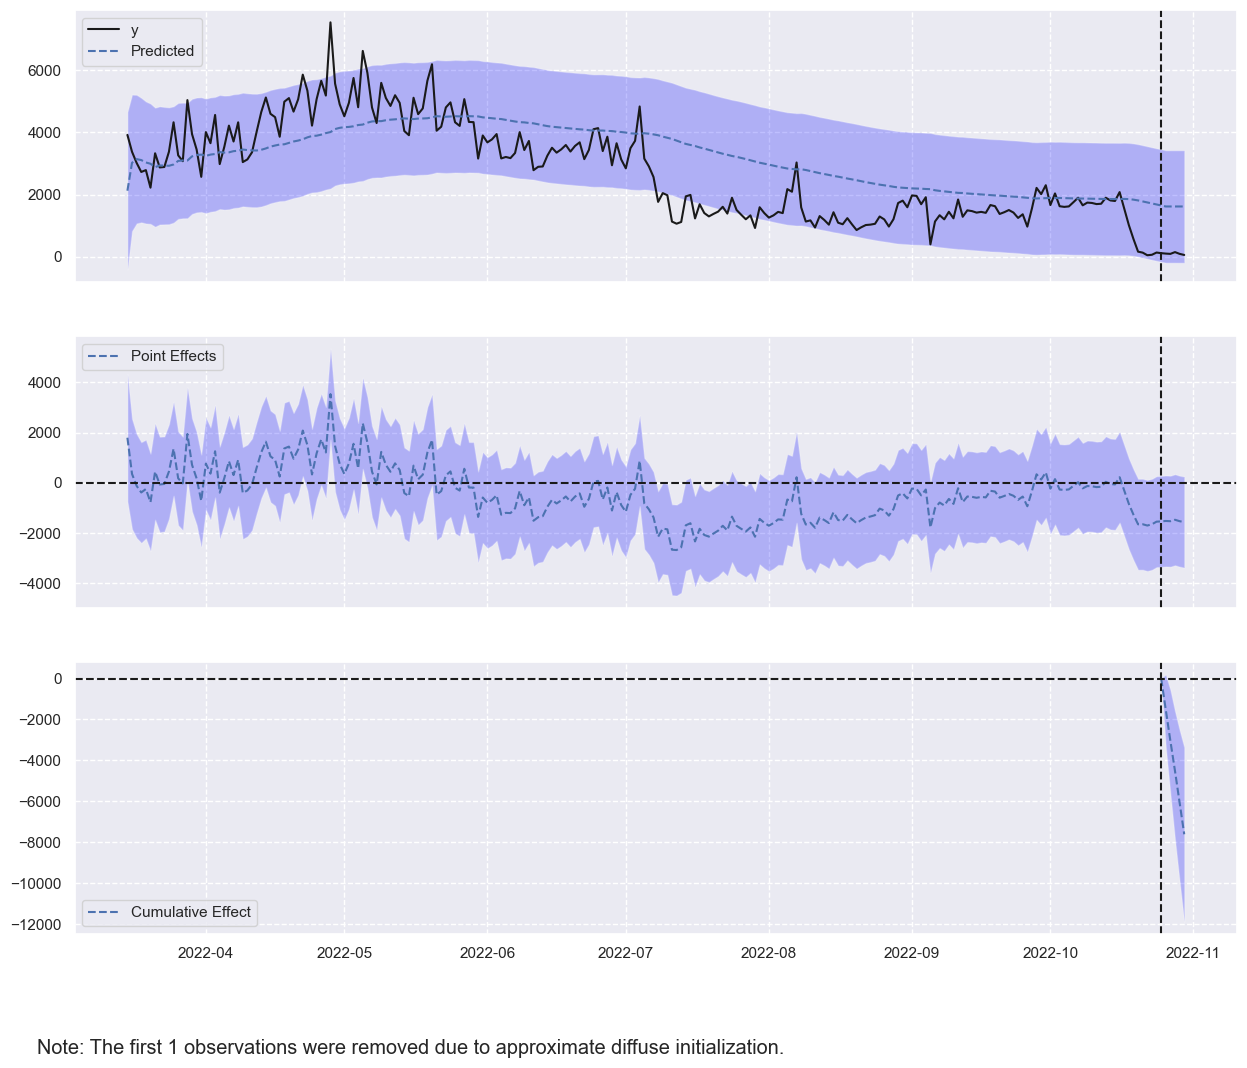

In [396]:
# Causal impact model, default prior_level_sd=0.01
impact_001 = CausalImpact(data=data, pre_period=pre_period, post_period=post_period)
# Visualization
impact_001.plot()

In [397]:
print(impact_001.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 94.2. By contrast, in the absence of an
intervention, we would have expected an average response of 1615.05.
The 95% interval of this counterfactual prediction is [764.42, 2468.11].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -1520.85 with a 95% interval of
[-2373.91, -670.22]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 471.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 8075.25. The 95% interval of this prediction is [3822.1, 12340.56].


The above results are given in terms of absolute numbers. In relative
terms, the r

In [398]:
print(impact_001.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    94.2               471.0
Prediction (s.d.)         1615.05 (434.62)   8075.25 (2173.12)
95% CI                    [764.42, 2468.11]  [3822.1, 12340.56]

Absolute effect (s.d.)    -1520.85 (434.62)  -7604.25 (2173.12)
95% CI                    [-2373.91, -670.22][-11869.56, -3351.1]

Relative effect (s.d.)    -94.17% (26.91%)   -94.17% (26.91%)
95% CI                    [-146.99%, -41.5%] [-146.99%, -41.5%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: nseasons, prior_level_sd, standardize. After release 0.14, this will raise.
  warnings.warn(


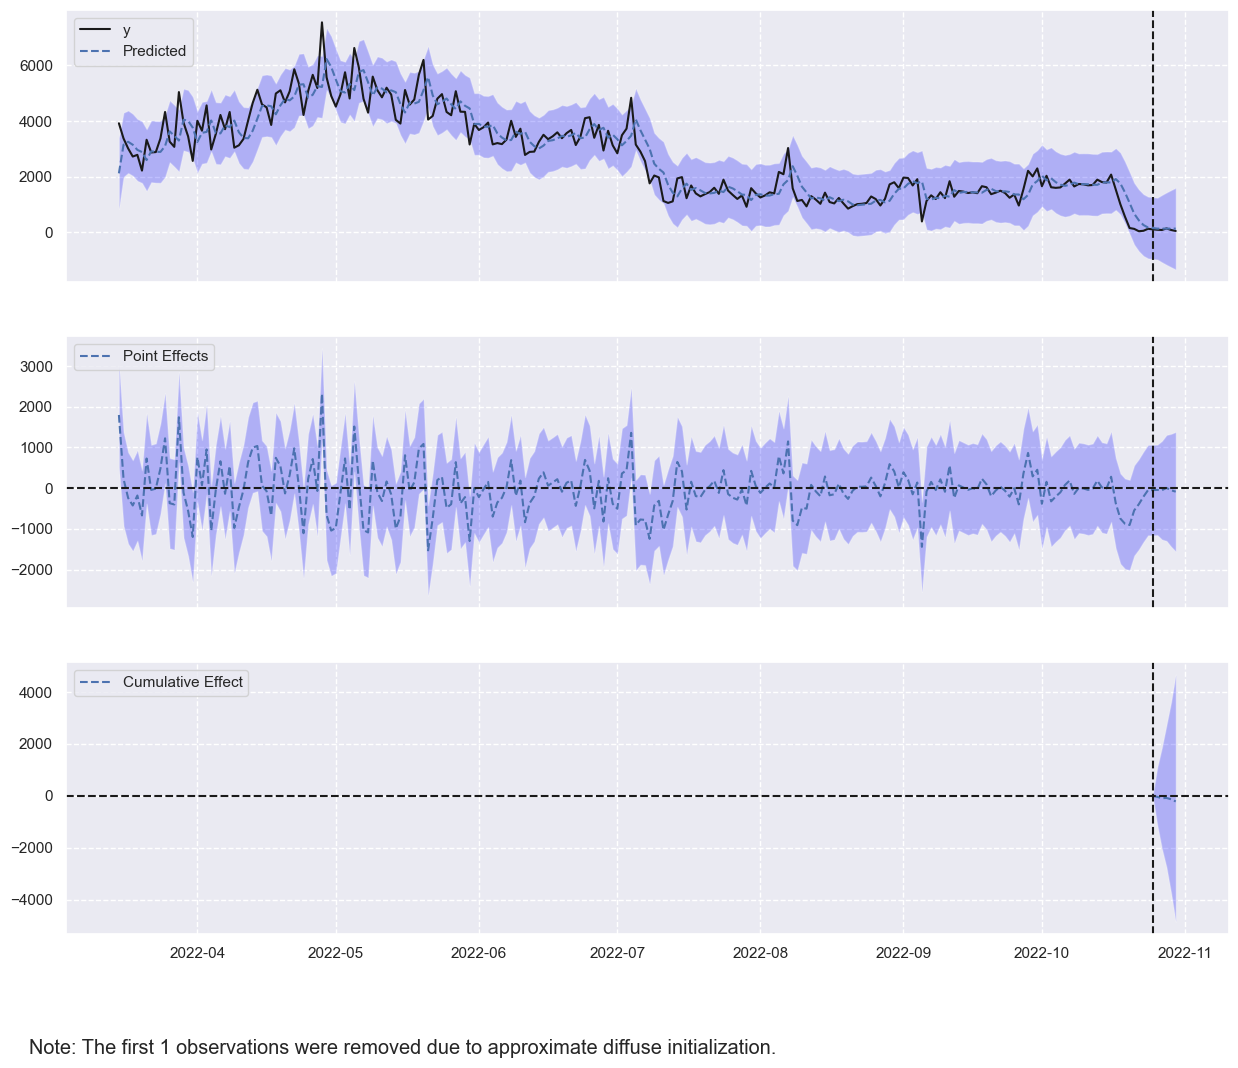

In [399]:
# Causal impact model, default prior_level_sd=0.01
impact_015 = CausalImpact(data=data, pre_period=pre_period, post_period=post_period, prior_level_sd=0.15)
# Visualization
impact_015.plot()

In [400]:
print(impact_015.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 94.2. In the absence of an
intervention, we would have expected an average response of 137.36.
The 95% interval of this counterfactual prediction is [-840.06, 1063.53].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -43.16 with a 95% interval of
[-969.33, 934.26]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 471.0.
Had the intervention not taken place, we would have expected
a sum of 686.81. The 95% interval of this prediction is [-4200.32, 5317.64].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a decr

In [401]:
print(impact_015.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    94.2               471.0
Prediction (s.d.)         137.36 (485.62)    686.81 (2428.1)
95% CI                    [-840.06, 1063.53] [-4200.32, 5317.64]

Absolute effect (s.d.)    -43.16 (485.62)    -215.81 (2428.1)
95% CI                    [-969.33, 934.26]  [-4846.64, 4671.32]

Relative effect (s.d.)    -31.42% (353.53%)  -31.42% (353.53%)
95% CI                    [-705.67%, 680.15%][-705.67%, 680.15%]

Posterior tail-area probability p: 0.48
Posterior prob. of a causal effect: 52.25%

For more details run the command: print(impact.summary('report'))


# Treatment start date: 2022-10-20

In [402]:
pre_period  = [ pd.Timestamp('2022-03-14') , pd.Timestamp('2022-10-19') ]
post_period = [ pd.Timestamp('2022-10-20') , pd.Timestamp('2022-10-30') ]

# Set pre-period
pre_period = [str(df.Date.min())[:10], str('2022-10-19')]
# Set post-period
post_period = [str('2022-10-20'), str(df.Date.max())[:10]]
# Print out the values
print(f'The pre-period is {pre_period}')
print(f'The post-period is {post_period}')

The pre-period is ['2022-03-14', '2022-10-19']
The post-period is ['2022-10-20', '2022-10-30']


In [403]:
# Calculate the pre-daily average
pre_daily_avg = df['Spend'][df.Date <= '2022-10-19'].mean()
# Calculate the post-daily average
post_daily_avg = df['Spend'][df.Date > '2022-10-19'].mean()
# Print out the results
print(f'The pre-treatment daily average is {pre_daily_avg}.')
print(f'The post-treatment daily average is {post_daily_avg}.')
print(f'The raw difference between the pre and the post treatment is {post_daily_avg - pre_daily_avg}.')

The pre-treatment daily average is 2840.759090909091.
The post-treatment daily average is 100.27272727272727.
The raw difference between the pre and the post treatment is -2740.4863636363634.


In [404]:
data=df[['Date', 'Spend']]

In [405]:
data.set_index('Date', inplace=True)

/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


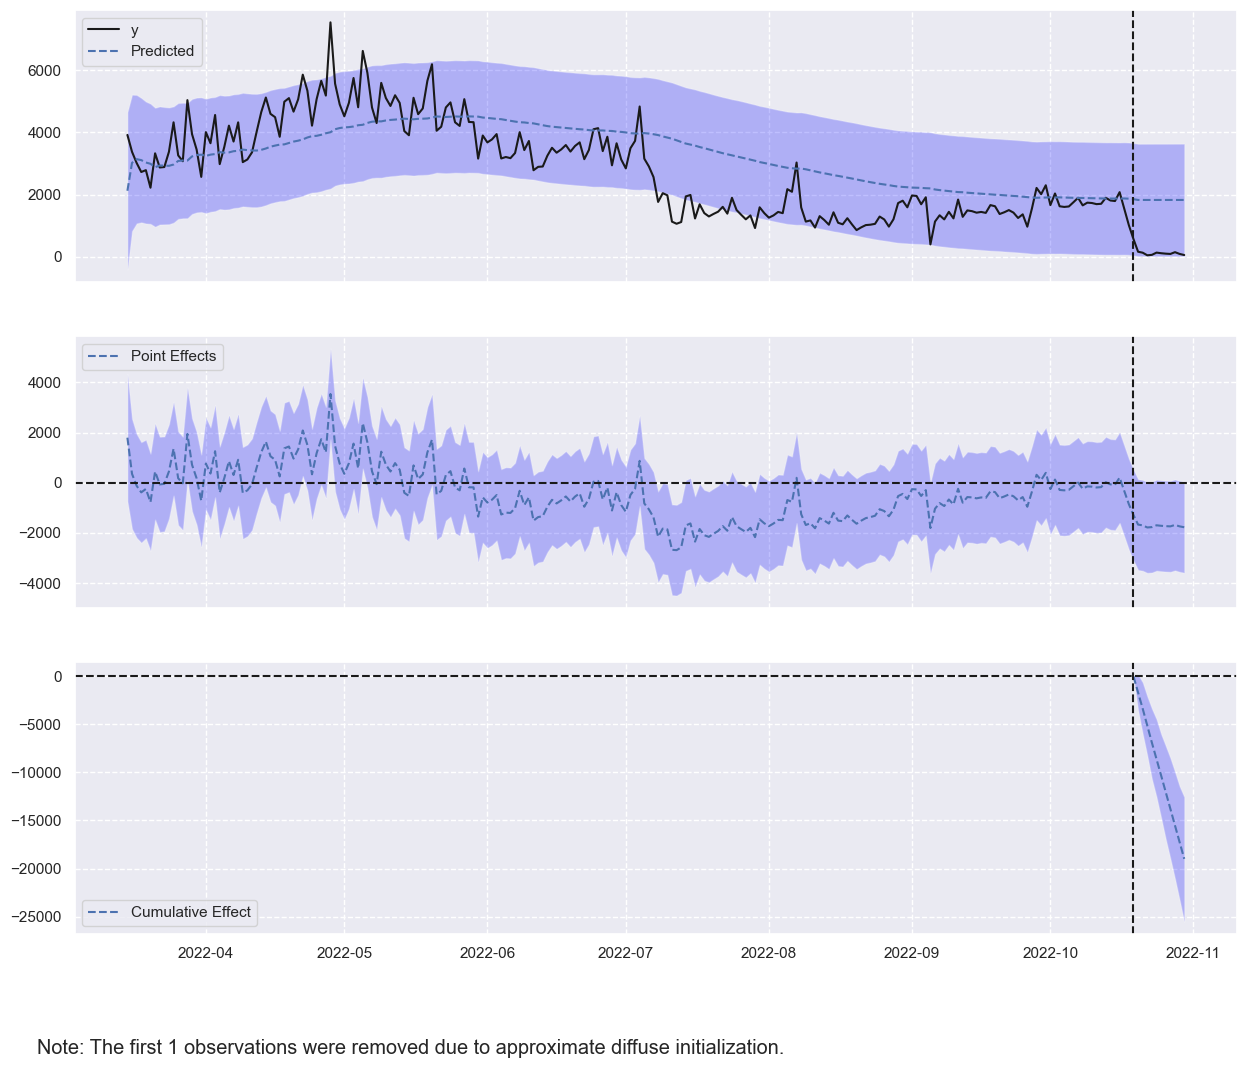

In [406]:
impact_001 = CausalImpact(data=data, pre_period=pre_period, post_period=post_period)
impact_001.plot()

In [407]:
print(impact_001.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    100.27             1103.0
Prediction (s.d.)         1826.53 (301.06)   20091.81 (3311.66)
95% CI                    [1240.5, 2420.63]  [13645.46, 26626.91]

Absolute effect (s.d.)    -1726.26 (301.06)  -18988.81 (3311.66)
95% CI                    [-2320.36, -1140.22][-25523.91, -12542.46]

Relative effect (s.d.)    -94.51% (16.48%)   -94.51% (16.48%)
95% CI                    [-127.04%, -62.43%][-127.04%, -62.43%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [408]:
print(impact_001.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 100.27. By contrast, in the absence of an
intervention, we would have expected an average response of 1826.53.
The 95% interval of this counterfactual prediction is [1240.5, 2420.63].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -1726.26 with a 95% interval of
[-2320.36, -1140.22]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1103.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 20091.81. The 95% interval of this prediction is [13645.46, 26626.91].


The above results are given in terms of absolute numbers. In relative
terms

/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: nseasons, prior_level_sd, standardize. After release 0.14, this will raise.
  warnings.warn(


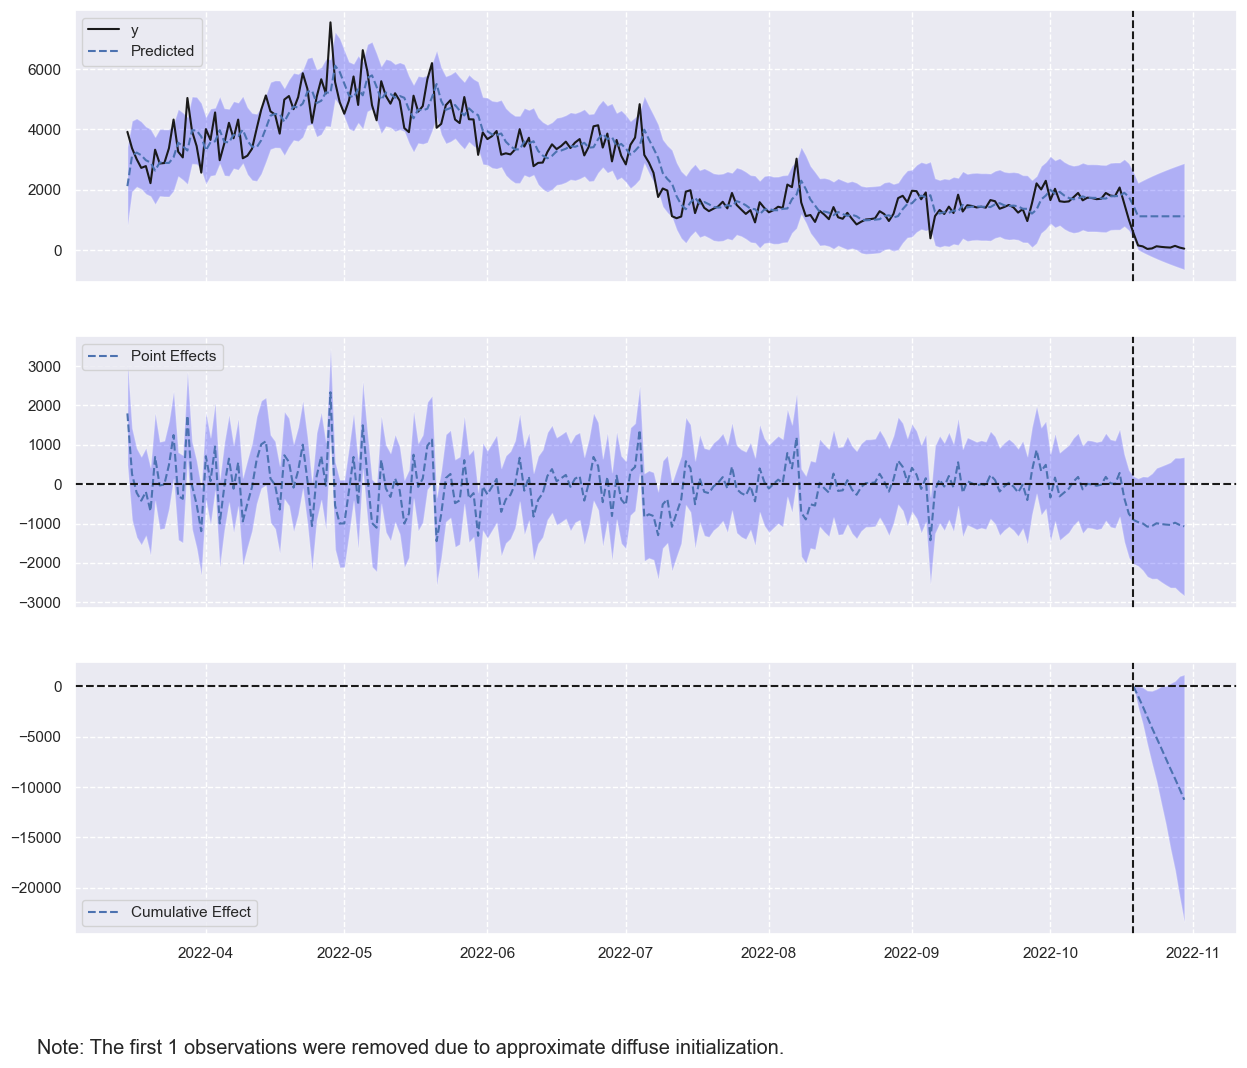

In [409]:
impact_015 = CausalImpact(data=data, pre_period=pre_period, post_period=post_period, prior_level_sd=0.15)
impact_015.plot()

In [410]:
print(impact_015.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    100.27             1103.0
Prediction (s.d.)         1124.0 (569.21)    12363.97 (6261.35)
95% CI                    [-6.43, 2224.85]   [-70.71, 24473.35]

Absolute effect (s.d.)    -1023.72 (569.21)  -11260.97 (6261.35)
95% CI                    [-2124.58, 106.7]  [-23370.35, 1173.71]

Relative effect (s.d.)    -91.08% (50.64%)   -91.08% (50.64%)
95% CI                    [-189.02%, 9.49%]  [-189.02%, 9.49%]

Posterior tail-area probability p: 0.04
Posterior prob. of a causal effect: 96.1%

For more details run the command: print(impact.summary('report'))


In [411]:
print(impact_015.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 100.27. In the absence of an
intervention, we would have expected an average response of 1124.0.
The 95% interval of this counterfactual prediction is [-6.43, 2224.85].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -1023.72 with a 95% interval of
[-2124.58, 106.7]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1103.0.
Had the intervention not taken place, we would have expected
a sum of 12363.97. The 95% interval of this prediction is [-70.71, 24473.35].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a 